Dataset size: (1567, 592)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass_Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB
None
                 0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.0000

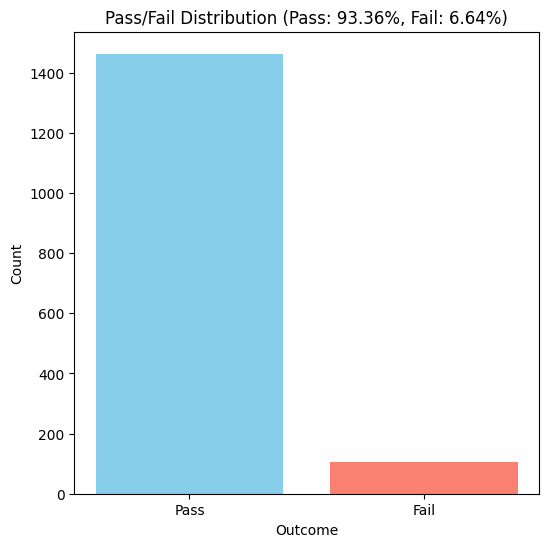

----- Step 1: Original Data (Imbalanced) -----
                 Model  Accuracy       TPR       FPR  F1 Score
0        Decision Tree  0.872611  0.083333  0.062069  0.511208
1          Naive Bayes  0.433121  0.750000  0.593103  0.369136
2  Logistic Regression  0.888535  0.250000  0.058621  0.597539
3                 K-NN  0.926752  0.041667  0.000000  0.520929
4                  SVM  0.923567  0.000000  0.000000  0.480132
5       Neural Network  0.914013  0.083333  0.017241  0.541903

Step 1 Average Results:
Accuracy    0.826433
TPR         0.201389
FPR         0.121839
F1 Score    0.503475
dtype: float64


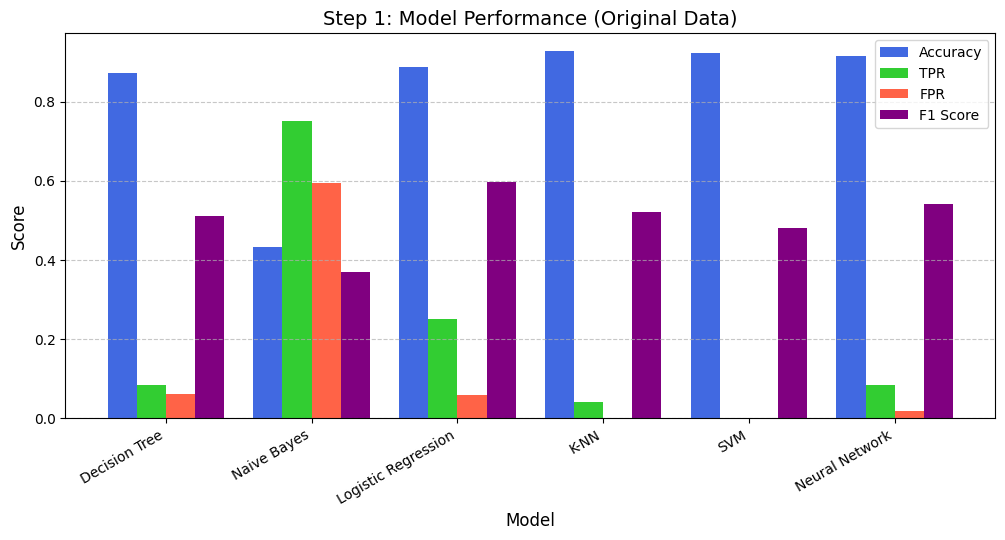

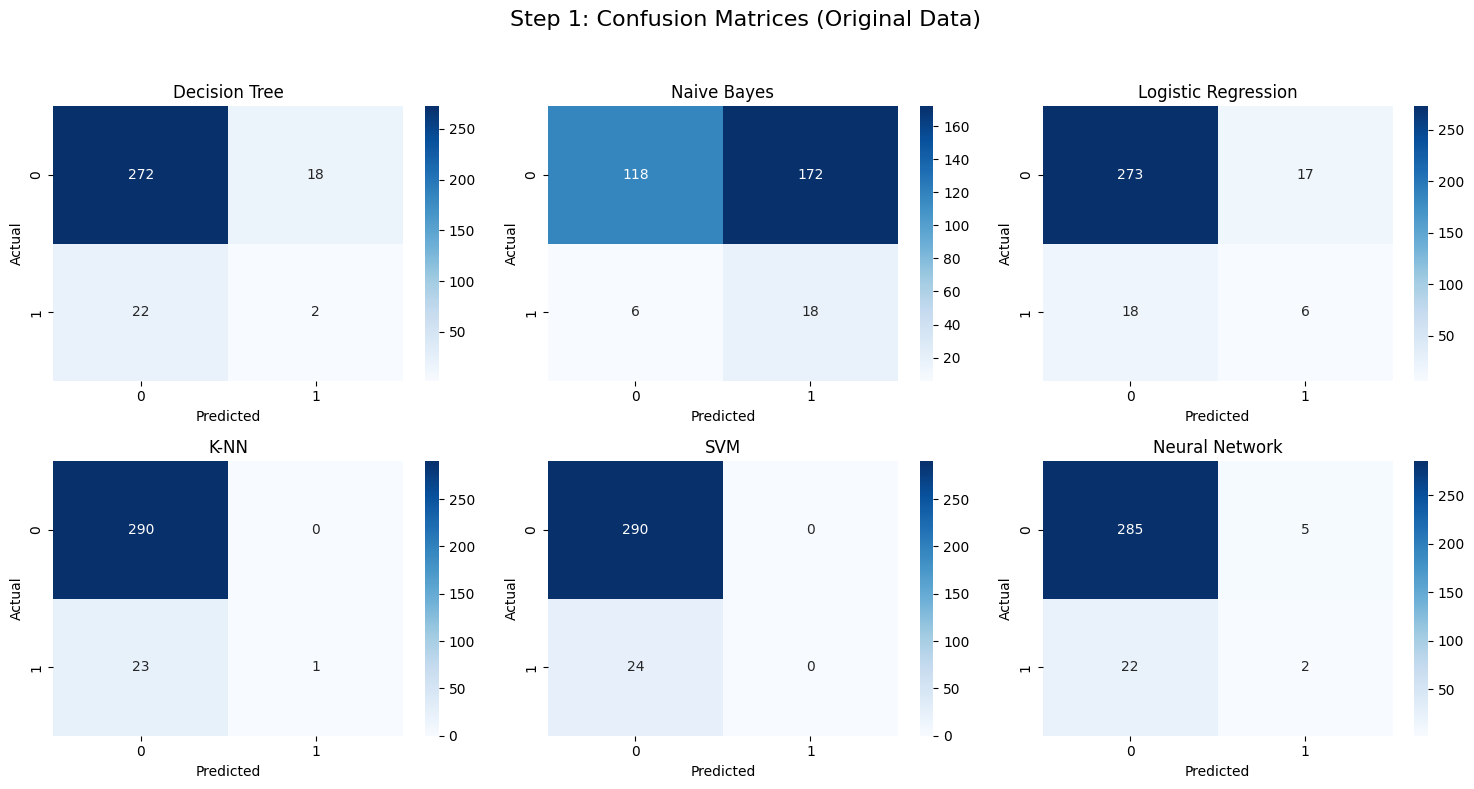

----- Step 2: SMOTE Applied -----
Shape after rebalancing training data: (2346, 204)
                 Model  Accuracy       TPR       FPR  F1 Score
0        Decision Tree  0.843949  0.083333  0.093103  0.495127
1          Naive Bayes  0.484076  0.625000  0.527586  0.392345
2  Logistic Regression  0.796178  0.416667  0.172414  0.560224
3                 K-NN  0.289809  0.916667  0.762069  0.273533
4                  SVM  0.920382  0.041667  0.006897  0.516238
5       Neural Network  0.891720  0.125000  0.044828  0.546088

Step 2 Average Results:
Accuracy    0.704352
TPR         0.368056
FPR         0.267816
F1 Score    0.463926
dtype: float64


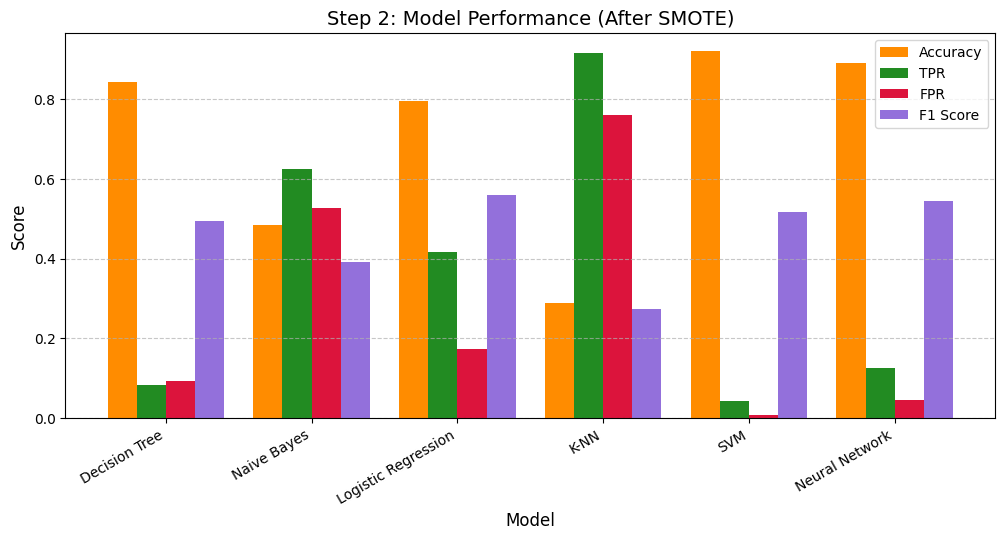

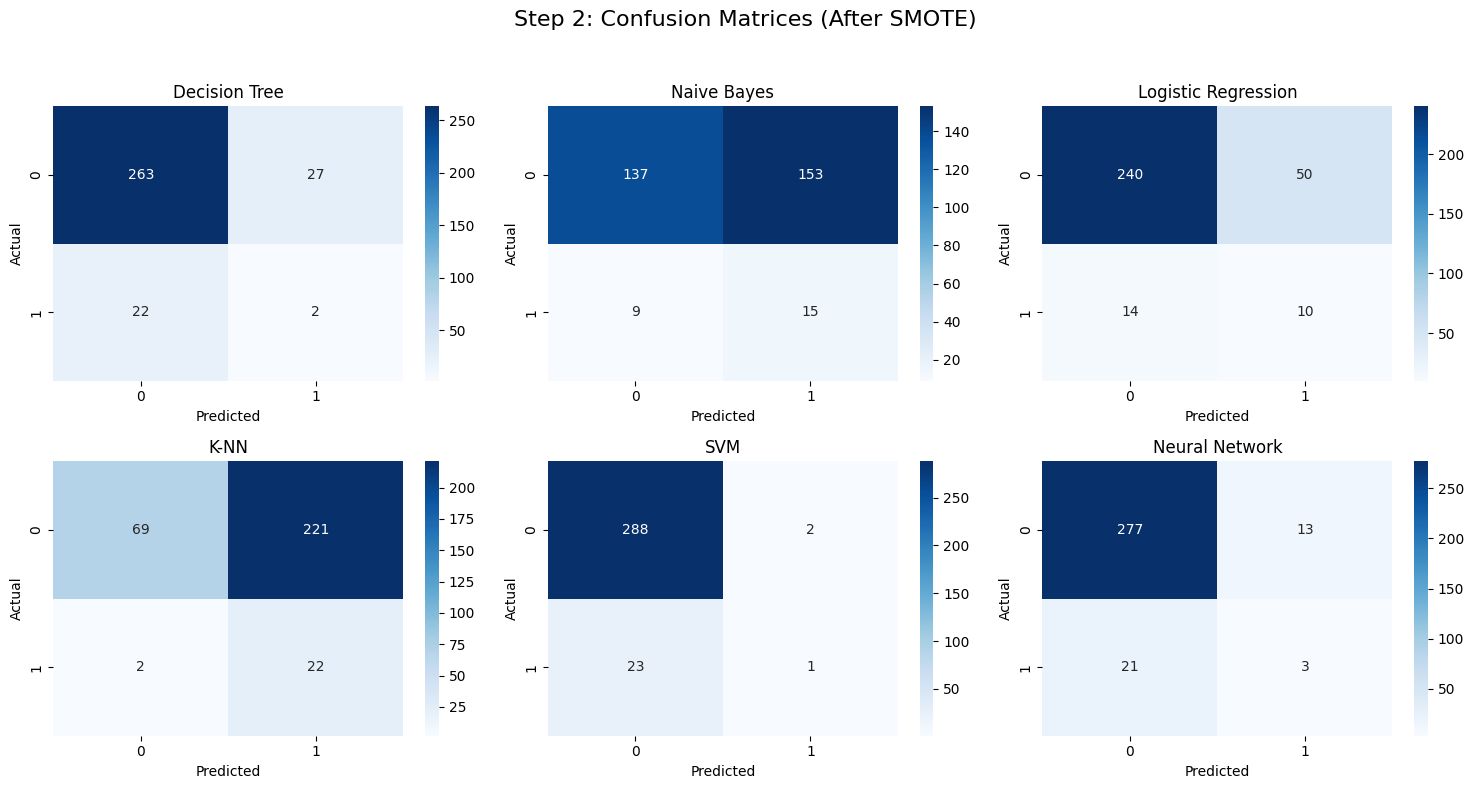

----- Step 3: SMOTE + PCA (Dimensionality Reduction) -----
Shape after rebalancing training data (SMOTE applied): (2346, 204)
X_train shape after PCA: (2346, 50)
                 Model  Accuracy       TPR       FPR  F1 Score
0        Decision Tree  0.828025  0.291667  0.127586  0.554727
1          Naive Bayes  0.802548  0.208333  0.148276  0.513689
2  Logistic Regression  0.726115  0.333333  0.241379  0.496682
3                 K-NN  0.859873  0.375000  0.100000  0.606292
4                  SVM  0.907643  0.083333  0.024138  0.536236
5       Neural Network  0.894904  0.125000  0.041379  0.548909

Step 3 Average Results:
Accuracy    0.836518
TPR         0.236111
FPR         0.113793
F1 Score    0.542756
dtype: float64


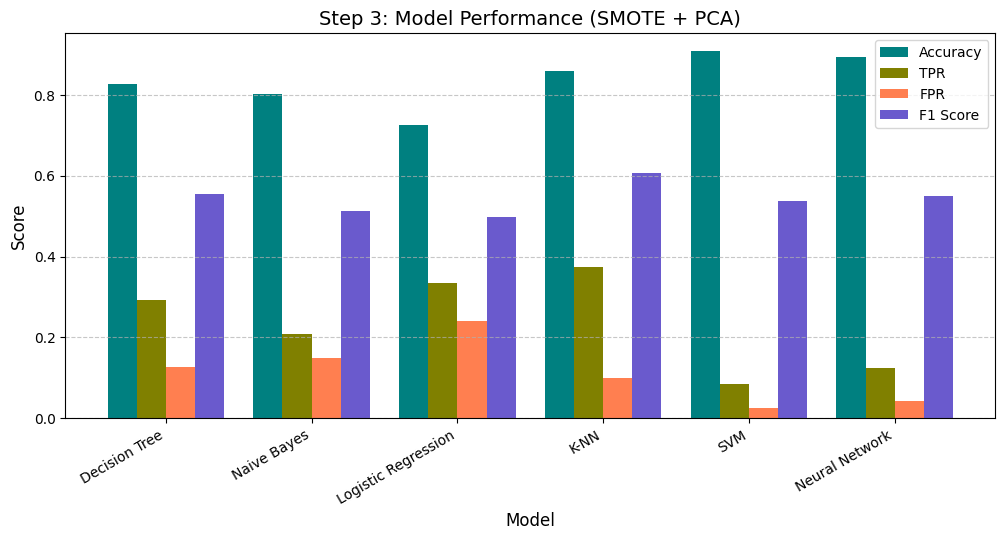

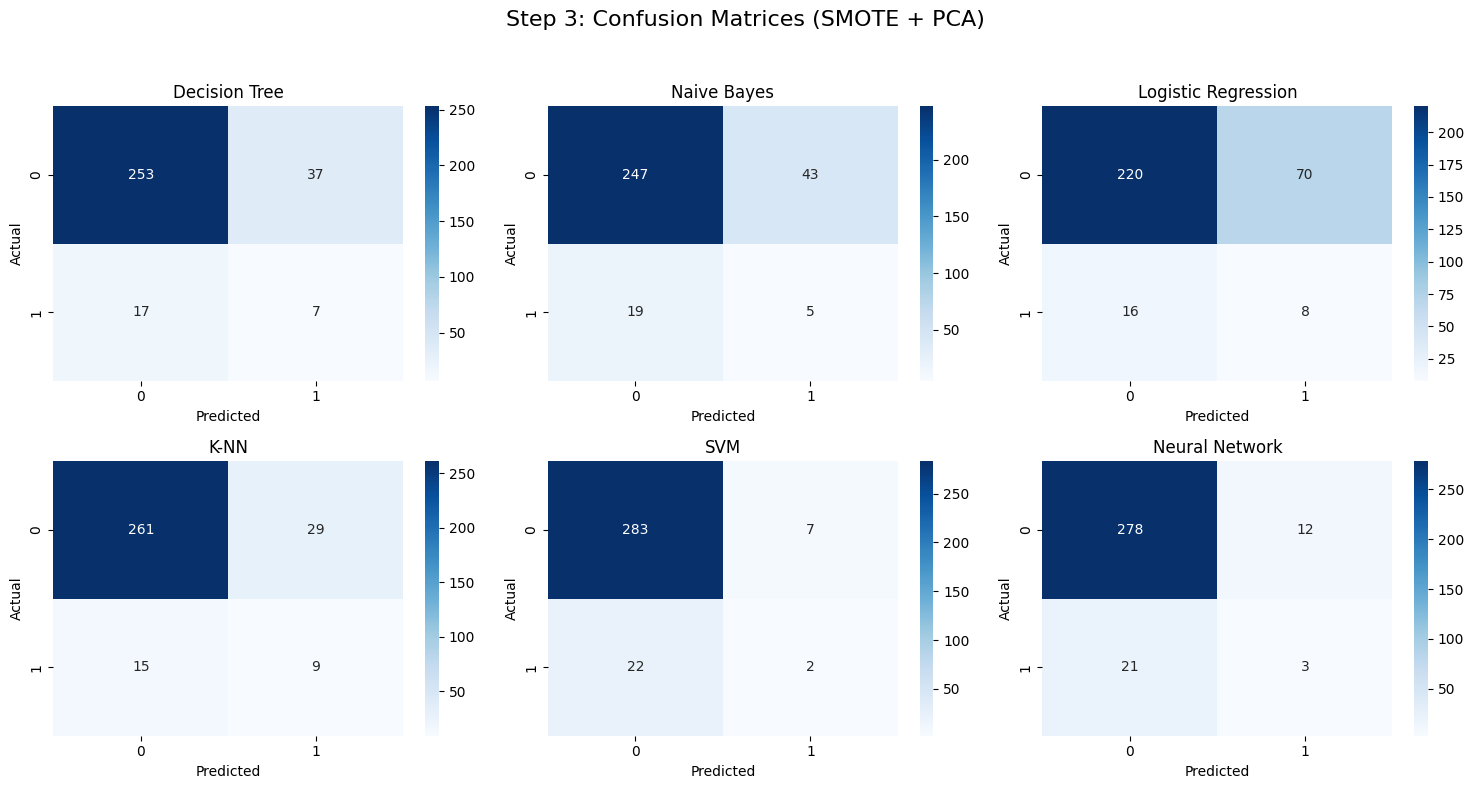

----- Step 4: SMOTE + Statistical Feature Selection + PCA (Non GridSearchCV) -----
Shape after rebalancing training data: (1759, 204)
Number of selected features: 15
                 Model  Accuracy       TPR       FPR  F1 Score
0        Decision Tree  0.805732  0.250000  0.148276  0.527237
1          Naive Bayes  0.710191  0.500000  0.272414  0.515654
2  Logistic Regression  0.812102  0.333333  0.148276  0.553321
3                 K-NN  0.761146  0.500000  0.217241  0.550324
4                  SVM  0.875796  0.291667  0.075862  0.598162
5       Neural Network  0.894904  0.291667  0.055172  0.620537

Step 4 Average Results:
Accuracy    0.809979
TPR         0.361111
FPR         0.152874
F1 Score    0.560872
dtype: float64


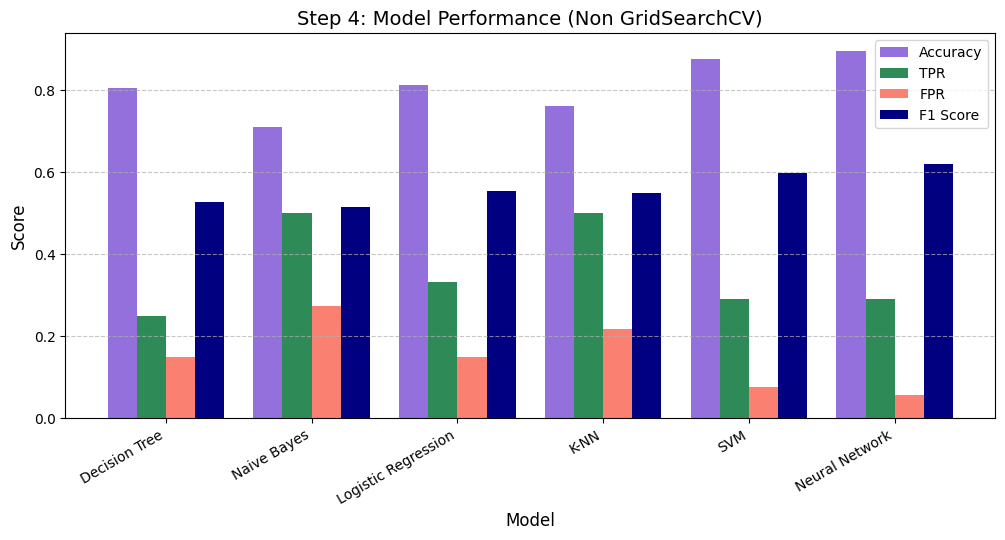

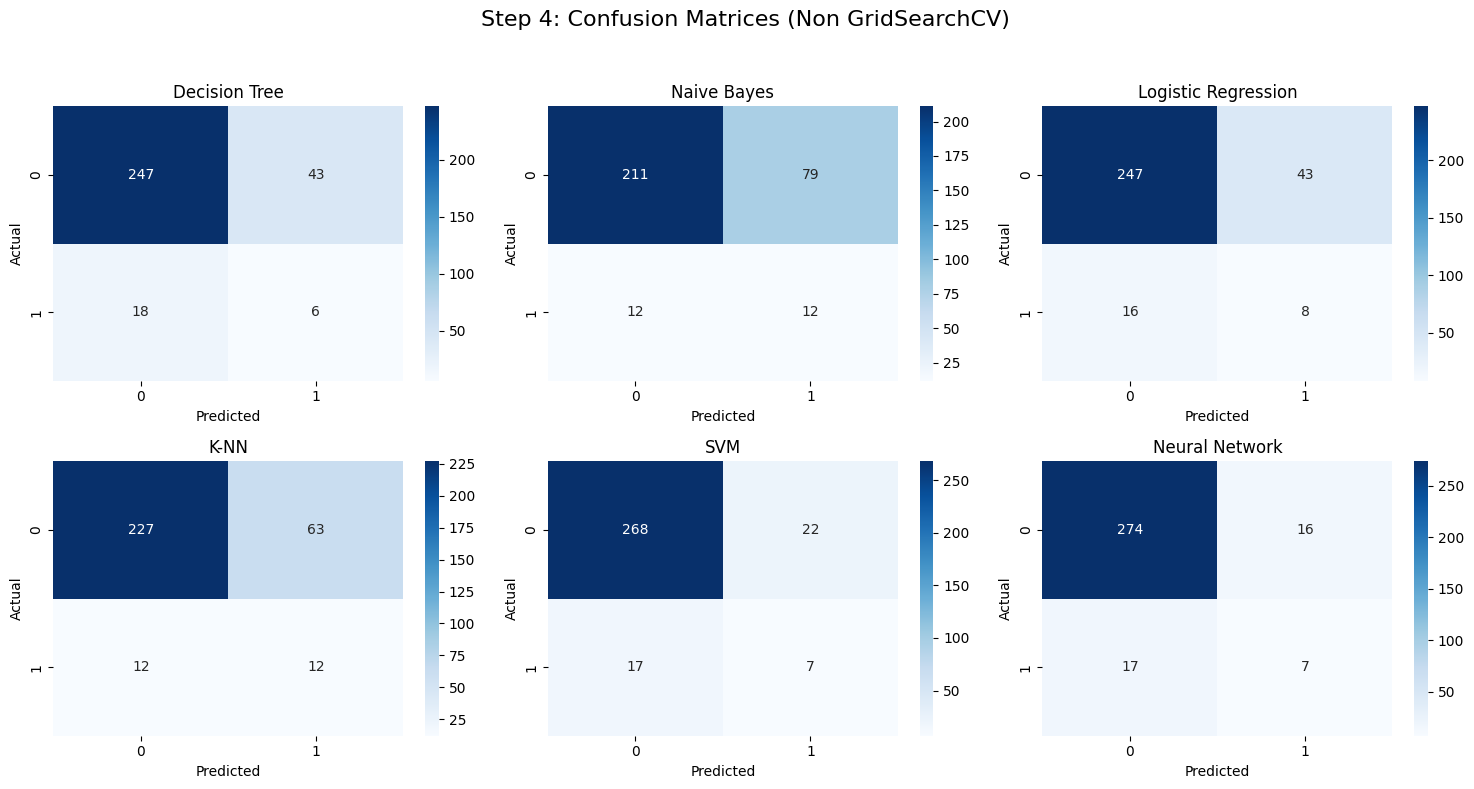

----- Step 5: SMOTE + Statistical Feature Selection + PCA (GridSearchCV) -----
          Model  Accuracy       TPR       FPR  F1 Score
0  Hybrid Model  0.898089  0.166667  0.041379  0.572789

Best Estimator:
Pipeline(steps=[('feature_selection',
                 ColumnTransformer(transformers=[('selector', 'passthrough',
                                                  ['28', '59', '63', '64', '79',
                                                   '103', '121', '122', '129',
                                                   '133', '144', '170', '183',
                                                   '468', '510'])])),
                ('hpca', HierarchicalPCA()),
                ('classifier', MLPClassifier(max_iter=1000))])

Best Parameters:
{'classifier': MLPClassifier(max_iter=1000), 'hpca__n_clusters': 15}

Step 5 Average Results:
Accuracy    0.898089
TPR         0.166667
FPR         0.041379
F1 Score    0.572789
dtype: float64


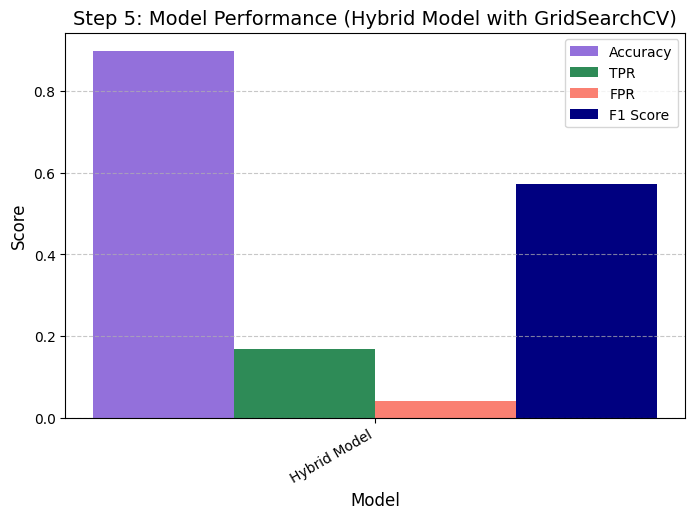

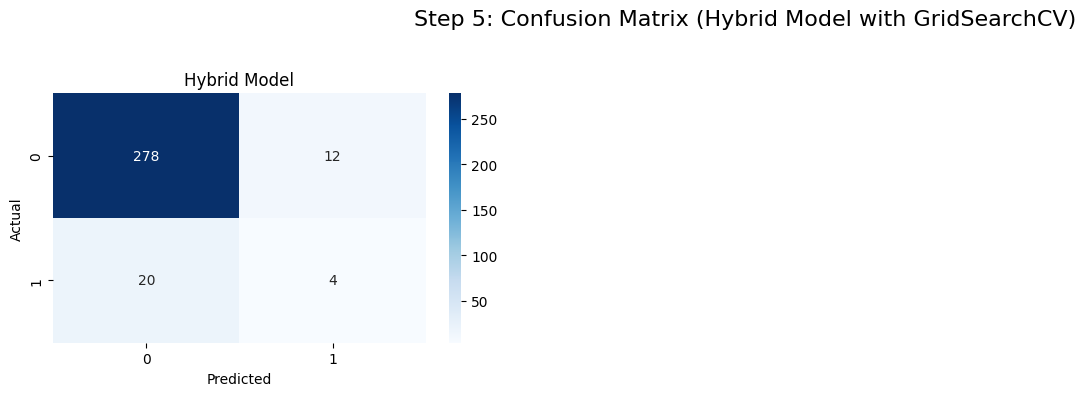

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import SMOTE
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import FeatureAgglomeration

import warnings
warnings.filterwarnings('ignore')

# ==========================================================================
# 1. Data Loading and Basic Information
# ==========================================================================
file_path = "secom.csv"  
data = pd.read_csv(file_path)
data.rename(columns={"Pass/Fail": "Pass_Fail"}, inplace=True)

def dataset_info(df):
    print("Dataset size:", df.shape)
    print(df.info())
    print(df.describe())

dataset_info(data)

# ==========================================================================
# 2. Data Preprocessing
# ==========================================================================
# 2.1 Handling Missing Values: Remove columns with >50% missing values, then apply forward/backward fill
def missing_values(df):
    missing = df.isnull().sum()
    missing_percent = (missing / df.shape[0]) * 100
    missing_df = pd.DataFrame({'Missing_Records': missing, 'Percentage (%)': missing_percent})
    return missing_df[missing_df['Missing_Records'] > 0].sort_values(by='Percentage (%)', ascending=False)

missing_df = missing_values(data)
columns_to_drop = missing_df[missing_df["Percentage (%)"] > 50].index
data.drop(columns=columns_to_drop, inplace=True)
print(f"Dataset shape after removing {len(columns_to_drop)} columns with >50% missing values: {data.shape}")

data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

# 2.2 Remove Columns with Single Unique Value
unique_columns = [col for col in data.columns if data[col].nunique() == 1]
data.drop(columns=unique_columns, inplace=True)
print(f"Dataset shape after removing {len(unique_columns)} columns with a single unique value: {data.shape}")

# 2.3 Remove Time Data
if "Time" in data.columns:
    data.drop(columns=["Time"], inplace=True)
    print("Dataset shape after deleting 'Time' column:", data.shape)

# 2.4 Remove Highly Collinear Features (Correlation coefficient >= 0.7)
def remove_collinear_features(x, threshold=0.7):
    corr_matrix = x.corr()
    drop_cols = set()
    for i in range(len(corr_matrix.columns) - 1):
        for j in range(i + 1):
            if abs(corr_matrix.iloc[j, i+1]) >= threshold:
                drop_cols.add(corr_matrix.columns[i+1])
    return x.drop(columns=drop_cols)

data = remove_collinear_features(data, threshold=0.7)
print(f"Dataset shape after removing highly collinear features: {data.shape}")

# 2.5 Data Normalization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(columns=['Pass_Fail']))
data_scaled = pd.DataFrame(scaled_features, columns=data.drop(columns=['Pass_Fail']).columns)
data_scaled['Pass_Fail'] = data['Pass_Fail'].values
print("Final dataset shape:", data_scaled.shape)

# 2.6 Visualize Class Imbalance
def plot_target_distribution(df):
    plt.figure(figsize=(6,6))
    labels = ['Pass', 'Fail']
    size = df['Pass_Fail'].value_counts()
    total = sum(size)
    percentages = [f'{(count / total) * 100:.2f}%' for count in size]
    colors = ['skyblue', 'salmon']
    plt.bar(labels, size, color=colors)
    plt.xlabel("Outcome")
    plt.ylabel("Count")
    plt.title(f"Pass/Fail Distribution (Pass: {percentages[0]}, Fail: {percentages[1]})")
    plt.show()

plot_target_distribution(data)

# ==========================================================================
# 3. Train-Test Split (Common)
# ==========================================================================
X = data_scaled.drop(columns=['Pass_Fail'])
y = data_scaled['Pass_Fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==========================================================================
# 4. Model Definition (Common)
# ==========================================================================
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-NN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

# --- Function for Visualizing Confusion Matrices ---
def plot_confusion_matrices(cm_dict, step_title):
    n_models = len(cm_dict)
    cols = 3
    rows = int(np.ceil(n_models / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
    axes = axes.flatten()
    for ax, (name, cm) in zip(axes, cm_dict.items()):
        sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", ax=ax)
        ax.set_title(f"{name}")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")
    for i in range(n_models, len(axes)):
        fig.delaxes(axes[i])
    plt.suptitle(step_title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# ==========================================================================
# Step 1: Train and Evaluate Models on Original Data (Imbalanced)
# ==========================================================================
print("----- Step 1: Original Data (Imbalanced) -----")
results_step1 = []
cms_step1 = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    if cm.size == 4:
        tn, fp, fn, tp = cm.ravel()
    else:
        tn, fp, fn, tp = 0, 0, 0, 0
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    results_step1.append([name, acc, tpr, fpr, f1])
    cms_step1[name] = cm

results_df_step1 = pd.DataFrame(results_step1, columns=["Model", "Accuracy", "TPR", "FPR", "F1 Score"])
print(results_df_step1)

print("\nStep 1 Average Results:")
print(results_df_step1[['Accuracy','TPR','FPR','F1 Score']].mean())

# Bar Chart (Four Metrics)
bar_width = 0.2
index = np.arange(len(results_df_step1))
plt.figure(figsize=(12, 5))
plt.bar(index, results_df_step1["Accuracy"], bar_width, label="Accuracy", color="royalblue")
plt.bar(index + bar_width, results_df_step1["TPR"], bar_width, label="TPR", color="limegreen")
plt.bar(index + 2*bar_width, results_df_step1["FPR"], bar_width, label="FPR", color="tomato")
plt.bar(index + 3*bar_width, results_df_step1["F1 Score"], bar_width, label="F1 Score", color="purple")
plt.xlabel("Model", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Step 1: Model Performance (Original Data)", fontsize=14)
plt.xticks(index + 1.5*bar_width, results_df_step1["Model"], rotation=30, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Visualize Confusion Matrices
plot_confusion_matrices(cms_step1, "Step 1: Confusion Matrices (Original Data)")

# ==========================================================================
# Step 2: SMOTE (Applied to Training Data Only)
# ==========================================================================
print("----- Step 2: SMOTE Applied -----")
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Shape after rebalancing training data:", X_train_smote.shape)

results_step2 = []
cms_step2 = {}
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    if cm.size == 4:
        tn, fp, fn, tp = cm.ravel()
    else:
        tn, fp, fn, tp = 0, 0, 0, 0
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    results_step2.append([name, acc, tpr, fpr, f1])
    cms_step2[name] = cm

results_df_step2 = pd.DataFrame(results_step2, columns=["Model", "Accuracy", "TPR", "FPR", "F1 Score"])
print(results_df_step2)

print("\nStep 2 Average Results:")
print(results_df_step2[['Accuracy','TPR','FPR','F1 Score']].mean())

plt.figure(figsize=(12, 5))
plt.bar(index, results_df_step2["Accuracy"], bar_width, label="Accuracy", color="darkorange")
plt.bar(index + bar_width, results_df_step2["TPR"], bar_width, label="TPR", color="forestgreen")
plt.bar(index + 2*bar_width, results_df_step2["FPR"], bar_width, label="FPR", color="crimson")
plt.bar(index + 3*bar_width, results_df_step2["F1 Score"], bar_width, label="F1 Score", color="mediumpurple")
plt.xlabel("Model", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Step 2: Model Performance (After SMOTE)", fontsize=14)
plt.xticks(index + 1.5*bar_width, results_df_step2["Model"], rotation=30, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

plot_confusion_matrices(cms_step2, "Step 2: Confusion Matrices (After SMOTE)")

# ==========================================================================
# Step 3: SMOTE + PCA (Dimensionality Reduction)
# ==========================================================================
print("----- Step 3: SMOTE + PCA (Dimensionality Reduction) -----")
X_train_smote_pca, y_train_smote_pca = smote.fit_resample(X_train, y_train)
print("Shape after rebalancing training data (SMOTE applied):", X_train_smote_pca.shape)

pca_components = 50  # Adjust as needed
pca = PCA(n_components=pca_components, random_state=42)
X_train_pca = pca.fit_transform(X_train_smote_pca)
X_test_pca = pca.transform(X_test)
print("X_train shape after PCA:", X_train_pca.shape)

results_step3 = []
cms_step3 = {}
for name, model in models.items():
    model.fit(X_train_pca, y_train_smote_pca)
    y_pred = model.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    if cm.size == 4:
        tn, fp, fn, tp = cm.ravel()
    else:
        tn, fp, fn, tp = 0, 0, 0, 0
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    results_step3.append([name, acc, tpr, fpr, f1])
    cms_step3[name] = cm

results_df_step3 = pd.DataFrame(results_step3, columns=["Model", "Accuracy", "TPR", "FPR", "F1 Score"])
print(results_df_step3)

print("\nStep 3 Average Results:")
print(results_df_step3[['Accuracy','TPR','FPR','F1 Score']].mean())

plt.figure(figsize=(12, 5))
plt.bar(index, results_df_step3["Accuracy"], bar_width, label="Accuracy", color="teal")
plt.bar(index + bar_width, results_df_step3["TPR"], bar_width, label="TPR", color="olive")
plt.bar(index + 2*bar_width, results_df_step3["FPR"], bar_width, label="FPR", color="coral")
plt.bar(index + 3*bar_width, results_df_step3["F1 Score"], bar_width, label="F1 Score", color="slateblue")
plt.xlabel("Model", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Step 3: Model Performance (SMOTE + PCA)", fontsize=14)
plt.xticks(index + 1.5*bar_width, results_df_step3["Model"], rotation=30, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

plot_confusion_matrices(cms_step3, "Step 3: Confusion Matrices (SMOTE + PCA)")

# ==========================================================================
# Step 4: SMOTE + Statistical Feature Selection + PCA (Non GridSearchCV)
# ==========================================================================
print("----- Step 4: SMOTE + Statistical Feature Selection + PCA (Non GridSearchCV) -----")
# 1) Apply SMOTE (to training data)
smote_fs = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_smote_fs, y_train_smote_fs = smote_fs.fit_resample(X_train, y_train)
print("Shape after rebalancing training data:", X_train_smote_fs.shape)

# 2) Hybrid Feature Selection (Correlation + Variance)
def hybrid_feature_selection(X, y, corr_th=0.2, var_th=0.1):
    # Calculate Pearson correlation between each feature and target
    corr_values = [pearsonr(X[col], y)[0] for col in X.columns]
    corr_df = pd.DataFrame({'feature': X.columns, 'corr': corr_values})
    corr_df['abs_corr'] = corr_df['corr'].abs()
    corr_df = corr_df[corr_df['abs_corr'] > corr_th]
    
    # Apply VarianceThreshold
    var_selector = VarianceThreshold(threshold=var_th)
    var_selector.fit(X[corr_df['feature']])
    selected_features = X[corr_df['feature']].columns[var_selector.get_support()]
    
    return selected_features

selected_features = hybrid_feature_selection(
    pd.DataFrame(X_train_smote_fs, columns=X_train.columns),
    y_train_smote_fs,
    corr_th=0.15,
    var_th=0.05
)
print("Number of selected features:", len(selected_features))

# 3) Apply Hierarchical PCA (HierarchicalPCA class)
class HierarchicalPCA(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=15, n_components=0.95):
        self.n_clusters = n_clusters
        self.n_components = n_components
        
    def fit(self, X, y=None):
        if not hasattr(X, 'columns'):
            self.feature_names_ = np.arange(X.shape[1])
            X_df = pd.DataFrame(X, columns=self.feature_names_)
        else:
            X_df = X.copy()
            self.feature_names_ = X_df.columns
        self.clusterer_ = FeatureAgglomeration(n_clusters=self.n_clusters)
        self.clusterer_.fit(X_df)
        self.cluster_labels_ = self.clusterer_.labels_
        self.pcas_ = {}
        for i in range(self.n_clusters):
            cluster_indices = np.where(self.cluster_labels_ == i)[0]
            subset = X_df.iloc[:, cluster_indices]
            pca = PCA(n_components=self.n_components)
            pca.fit(subset)
            self.pcas_[i] = (cluster_indices, pca)
        return self
    
    def transform(self, X):
        if not hasattr(X, 'columns'):
            X_df = pd.DataFrame(X, columns=self.feature_names_)
        else:
            X_df = X.copy()
        transformed_list = []
        for i in range(self.n_clusters):
            cluster_indices, pca = self.pcas_[i]
            subset = X_df.iloc[:, cluster_indices]
            transformed_cluster = pca.transform(subset)
            transformed_list.append(transformed_cluster)
        return np.hstack(transformed_list)

# 4) Construct pipeline for each classifier and evaluate
results_step4 = []
cms_step4 = {}
for name, clf in models.items():
    pipeline = Pipeline([
        ('feature_selection', ColumnTransformer([
            ('selector', 'passthrough', list(selected_features))
        ])),
        ('hpca', HierarchicalPCA(n_clusters=15, n_components=0.95)),
        ('classifier', clf)
    ])
    
    pipeline.fit(X_train_smote_fs, y_train_smote_fs)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    if cm.size == 4:
        tn, fp, fn, tp = cm.ravel()
    else:
        tn, fp, fn, tp = 0, 0, 0, 0
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    results_step4.append([name, acc, tpr, fpr, f1])
    cms_step4[name] = cm

results_df_step4 = pd.DataFrame(results_step4, columns=["Model", "Accuracy", "TPR", "FPR", "F1 Score"])
print(results_df_step4)
print("\nStep 4 Average Results:")
print(results_df_step4[['Accuracy','TPR','FPR','F1 Score']].mean())

# Visualization
bar_width = 0.2
index4 = np.arange(len(results_df_step4))
plt.figure(figsize=(12, 5))
plt.bar(index4, results_df_step4["Accuracy"], bar_width, label="Accuracy", color="mediumpurple")
plt.bar(index4 + bar_width, results_df_step4["TPR"], bar_width, label="TPR", color="seagreen")
plt.bar(index4 + 2*bar_width, results_df_step4["FPR"], bar_width, label="FPR", color="salmon")
plt.bar(index4 + 3*bar_width, results_df_step4["F1 Score"], bar_width, label="F1 Score", color="navy")
plt.xlabel("Model", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Step 4: Model Performance (Non GridSearchCV)", fontsize=14)
plt.xticks(index4 + 1.5*bar_width, results_df_step4["Model"], rotation=30, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

plot_confusion_matrices(cms_step4, "Step 4: Confusion Matrices (Non GridSearchCV)")

# ==========================================================================
# Step 5: SMOTE + Statistical Feature Selection + PCA (GridSearchCV Optimization Applied)
# ==========================================================================
print("----- Step 5: SMOTE + Statistical Feature Selection + PCA (GridSearchCV) -----")

# Use the same SMOTE and feature selection
# (smote_fs, X_train_smote_fs, y_train_smote_fs, selected_features, and HierarchicalPCA class remain unchanged)

pipeline = Pipeline([
    ('feature_selection', ColumnTransformer([
        ('selector', 'passthrough', list(selected_features))
    ])),
    ('hpca', HierarchicalPCA(n_clusters=15, n_components=0.95)),
    ('classifier', LogisticRegression(solver='saga', max_iter=1000))  # initial value
])

param_grid = {
    'hpca__n_clusters': [10, 15, 20],
    'classifier': [
        DecisionTreeClassifier(),
        GaussianNB(),
        LogisticRegression(max_iter=1000),
        KNeighborsClassifier(n_neighbors=5),
        SVC(kernel='rbf', C=1),
        MLPClassifier(max_iter=1000)
    ]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train_smote_fs, y_train_smote_fs)

y_pred_step5 = grid_search.predict(X_test)
acc_step5 = accuracy_score(y_test, y_pred_step5)
cm_step5 = confusion_matrix(y_test, y_pred_step5)
f1_step5 = f1_score(y_test, y_pred_step5, average='macro')
if cm_step5.size == 4:
    tn, fp, fn, tp = cm_step5.ravel()
else:
    tn, fp, fn, tp = 0, 0, 0, 0
tpr_step5 = tp / (tp + fn) if (tp + fn) > 0 else 0
fpr_step5 = fp / (fp + tn) if (fp + tn) > 0 else 0

results_step5 = pd.DataFrame([["Hybrid Model", acc_step5, tpr_step5, fpr_step5, f1_step5]],
                             columns=["Model", "Accuracy", "TPR", "FPR", "F1 Score"])
print(results_step5)

cms_step5 = {"Hybrid Model": cm_step5}

print("\nBest Estimator:")
print(grid_search.best_estimator_)

print("\nBest Parameters:")
print(grid_search.best_params_)

print("\nStep 5 Average Results:")
print(results_step5[['Accuracy','TPR','FPR','F1 Score']].mean())

index5 = np.arange(len(results_step5))
plt.figure(figsize=(8, 5))
plt.bar(index5, results_step5["Accuracy"], bar_width, label="Accuracy", color="mediumpurple")
plt.bar(index5 + bar_width, results_step5["TPR"], bar_width, label="TPR", color="seagreen")
plt.bar(index5 + 2*bar_width, results_step5["FPR"], bar_width, label="FPR", color="salmon")
plt.bar(index5 + 3*bar_width, results_step5["F1 Score"], bar_width, label="F1 Score", color="navy")
plt.xlabel("Model", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Step 5: Model Performance (Hybrid Model with GridSearchCV)", fontsize=14)
plt.xticks(index5 + 1.5*bar_width, results_step5["Model"], rotation=30, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

plot_confusion_matrices(cms_step5, "Step 5: Confusion Matrix (Hybrid Model with GridSearchCV)")
